In [3]:
%reload_ext autoreload
%autoreload 2

import pyvo  #exoplanet.eu API
import pyexoplaneteu  #alternative package to access database
import numpy as np
import os
import pandas as pd
import utils as ut
import plot_utils as pu

import matplotlib.pyplot as plt

In [8]:
data = pyexoplaneteu.get_data()
df = pd.DataFrame.from_dict(data)
total_exos = len(df)
df_t = df.loc[df.detection_type == 'Primary Transit']
total_exos_t = len(df_t)
df_age = df['star_age']
df_age_t = df_t['star_age']
total_exos_age = len(df_age.dropna())
total_exos_age_t = len(df_age_t.dropna())


print(f'{total_exos_age} out of {total_exos} confirmed exoplanets have host star age determined ({100*total_exos_age/total_exos:.2f}%)')

print(f'{total_exos_t} out of {total_exos} confirmed exoplanets are transits ({100*total_exos_t/total_exos:.2f}%)')

print(f'{total_exos_age_t} out of {total_exos_t} confirmed transit exoplanets have host star age determined ({100*total_exos_age_t/total_exos_t:.2f}%)')

2936 out of 5506 confirmed exoplanets have host star age determined (53.32%)
3809 out of 5506 confirmed exoplanets are transits (69.18%)
2170 out of 3809 confirmed transit exoplanets have host star age determined (56.97%)


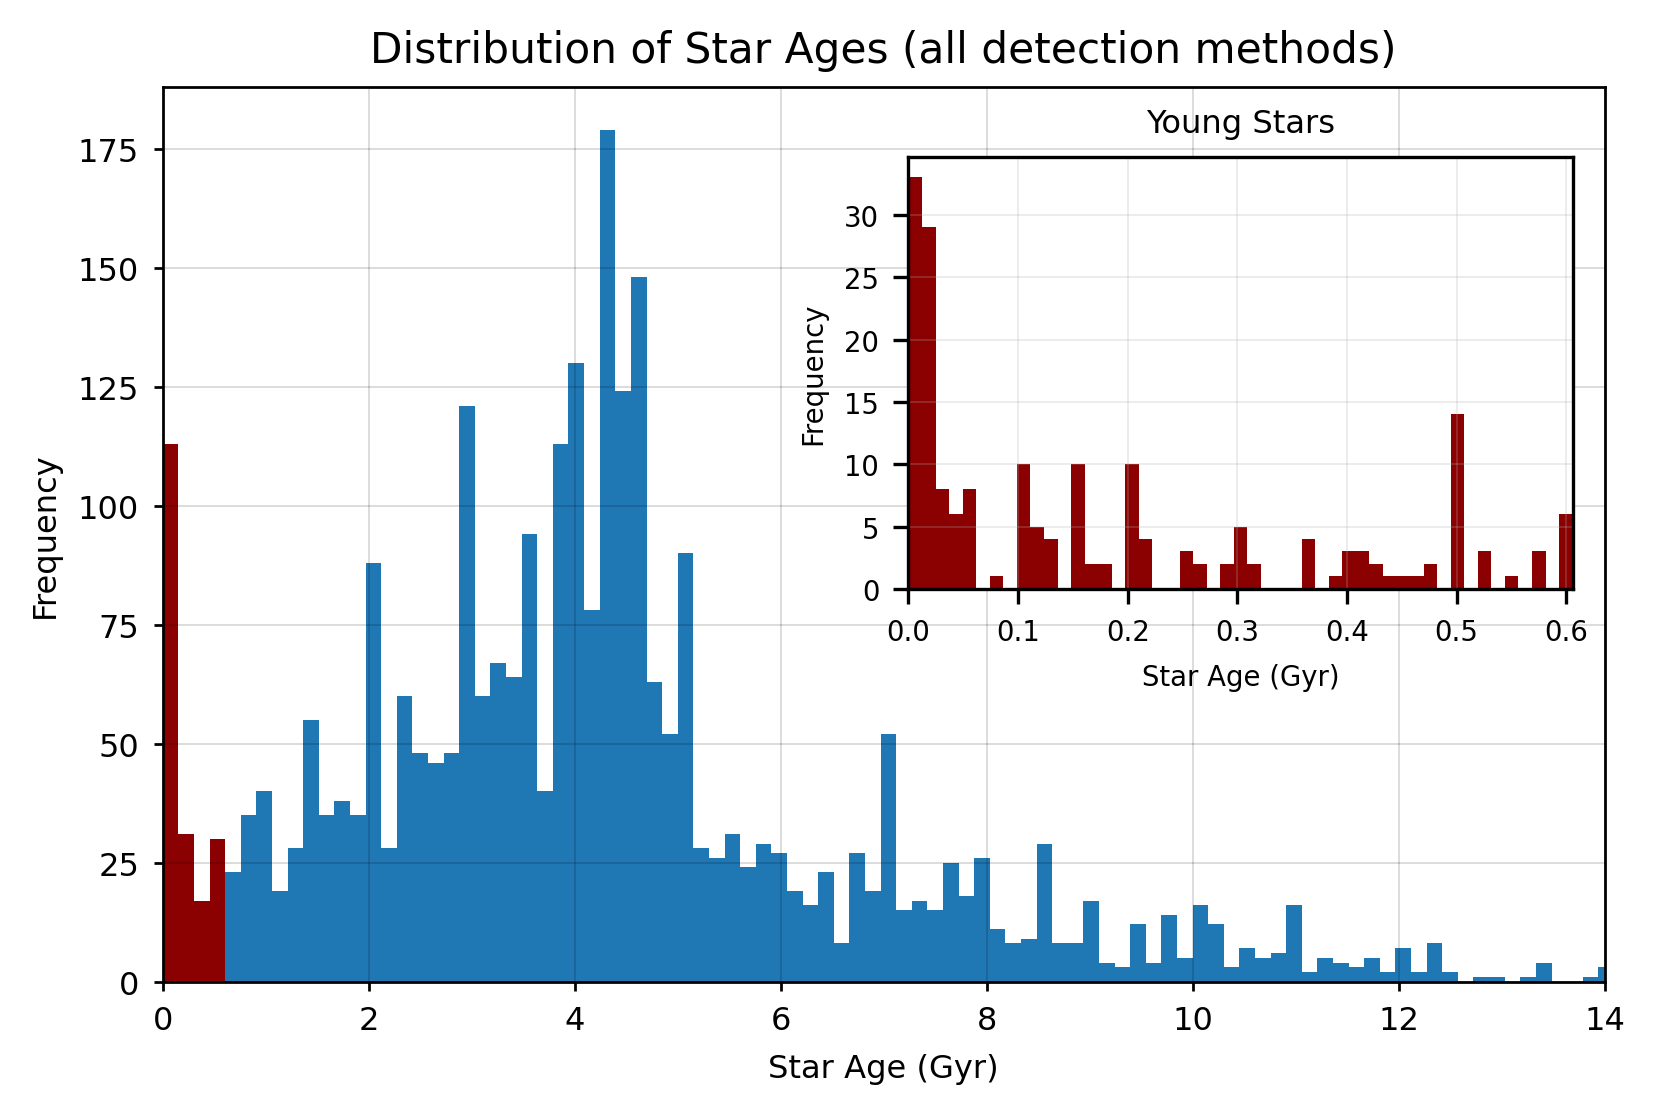

In [45]:
fig, ax, fs = pu.simp_figure(fig_w=1080*3/2, fig_h=1080, 
                             theme=None)

young_lim = 0.606
custom_bins_whole = np.linspace(0, 15, 100)
custom_bins_smol = np.linspace(0, young_lim, 50)


n, bins, patches = ax.hist(df['star_age'].dropna(), bins=custom_bins_whole, edgecolor=None, alpha=1)
for i in range(4):
    patches[i].set_facecolor('darkred')

# Set axis labels and title
ax.set_xlabel('Star Age (Gyr)', fontsize=1.75 * fs)
ax.set_ylabel('Frequency', fontsize=1.75 * fs)
# tick sizes
ax.tick_params(axis='both', which='major', labelsize=1.75 * fs)

inner_pos=[0.55, 0.47, 0.41, 0.4] 
# Add inner subplot
ax_in = fig.add_axes(inner_pos)
# set tick size and label size of inner subplot

ax_in.tick_params(axis='both', which='major', labelsize=1.5 * fs)
ax_in.set_xlabel('Star Age (Gyr)', fontsize=1.5 * fs)
ax_in.set_ylabel('Frequency', fontsize=1.5 * fs)
ax_in.hist(df['star_age'].dropna(), bins=custom_bins_smol, edgecolor=None, alpha=1, color='darkred')
ax_in.set_title('Young Stars', fontsize=1.75 * fs, color='k', zorder=3)
ax_in.grid(which='major', linewidth=fs * 0.025)
ax.set_title('Distribution of Star Ages (all detection methods)', fontsize=2.3 * fs, color='k')

ax.set_xlim([0, 14])
ax_in.set_xlim([0, young_lim])

savefold = '../figures/age_distros/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = 'all_meth_distr_age.png'
savepath = savefold + figname

fig.savefig(savepath, dpi=300, bbox_inches='tight')

plt.show()

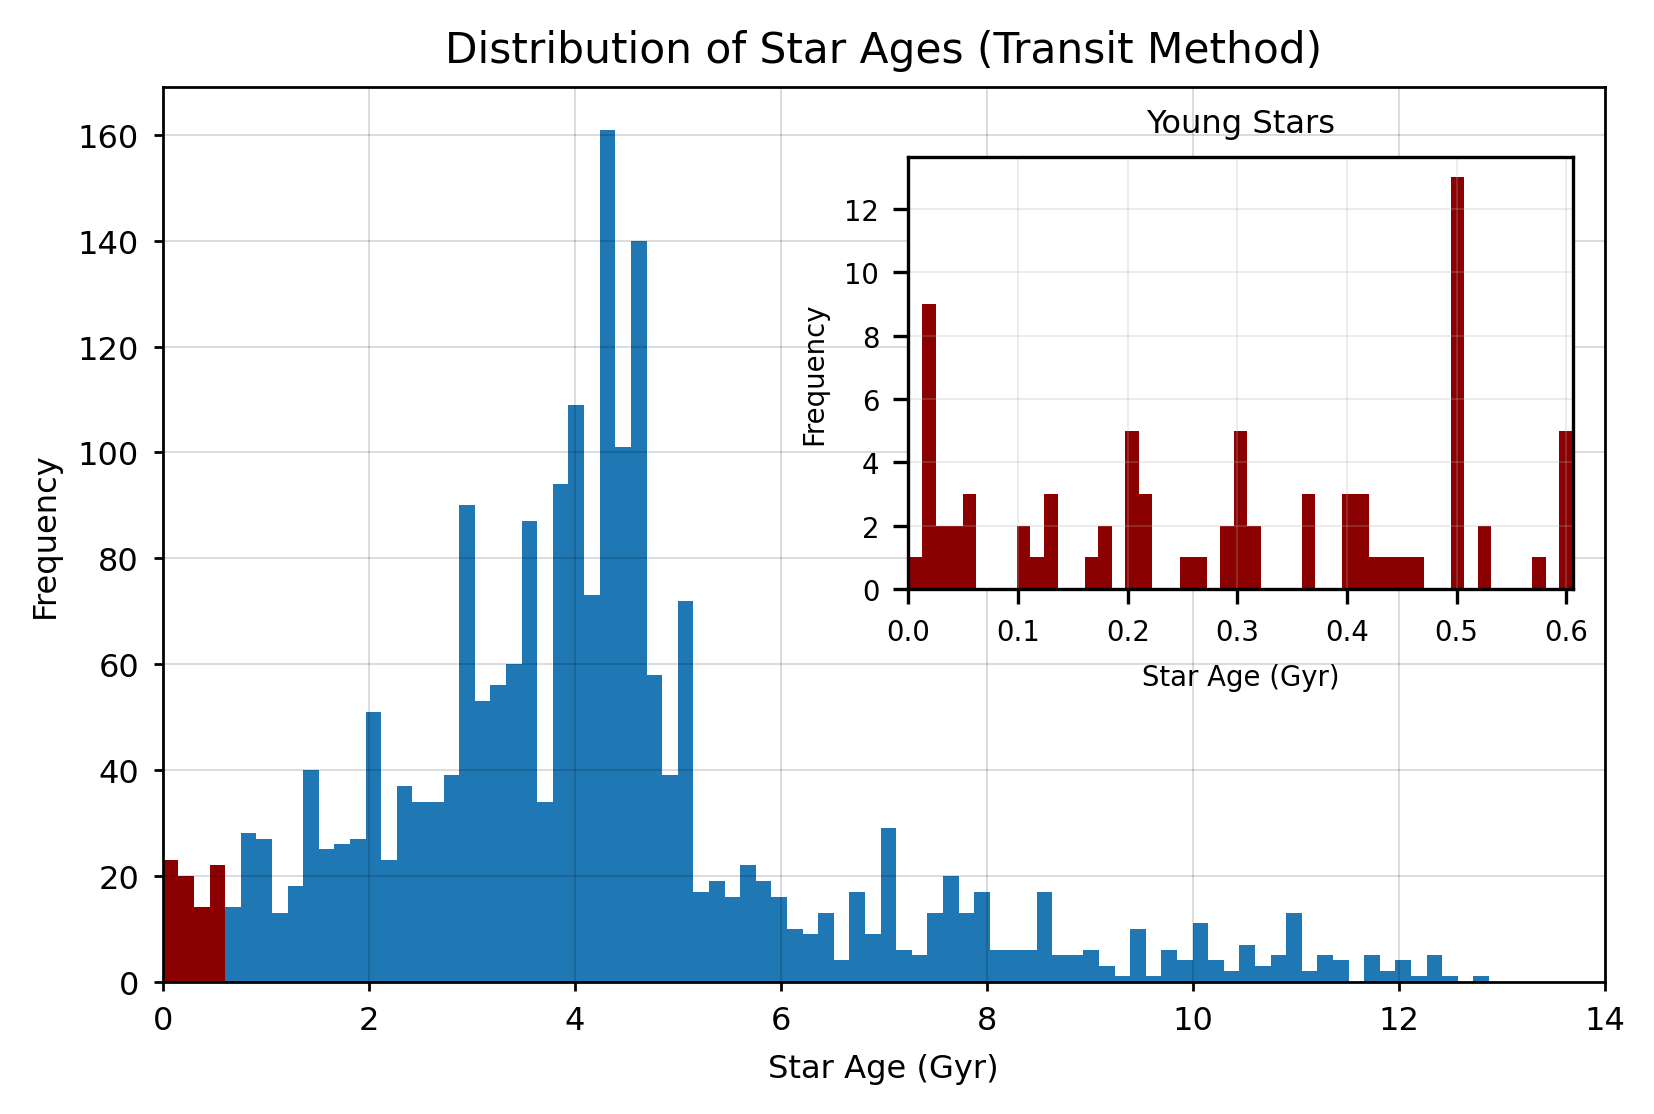

In [44]:
fig, ax, fs = pu.simp_figure(fig_w=1080*3/2, fig_h=1080, 
                             theme=None)

young_lim = 0.606
custom_bins_whole = np.linspace(0, 15, 100)
custom_bins_smol = np.linspace(0, young_lim, 50)

n, bins, patches = ax.hist(df_t['star_age'].dropna(), bins=custom_bins_whole, edgecolor=None, alpha=1)
for i in range(4):
    patches[i].set_facecolor('darkred')

# Set axis labels and title
ax.set_xlabel('Star Age (Gyr)', fontsize=1.75 * fs)
ax.set_ylabel('Frequency', fontsize=1.75 * fs)
ax.tick_params(axis='both', which='major', labelsize=1.75 * fs)


inner_pos=[0.55, 0.47, 0.41, 0.4] 
# Add inner subplot
ax_in = fig.add_axes(inner_pos)
# set tick size and label size of inner subplot

ax_in.tick_params(axis='both', which='major', labelsize=1.5 * fs)
ax_in.set_xlabel('Star Age (Gyr)', fontsize=1.5 * fs)
ax_in.set_ylabel('Frequency', fontsize=1.5 * fs)
ax_in.hist(df_t['star_age'].dropna(), bins=custom_bins_smol, edgecolor=None, alpha=1, color='darkred')
ax_in.set_title('Young Stars', fontsize=1.75 * fs, color='k', zorder=3)
ax_in.grid(which='major', linewidth=fs * 0.025)
ax.set_title('Distribution of Star Ages (Transit Method)', fontsize=2.3 * fs, color='k')

ax.set_xlim([0, 14])
ax_in.set_xlim([0, young_lim])

savefold = '../figures/age_distros/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = 'trans_meth_distr_age.png'
savepath = savefold + figname

fig.savefig(savepath, dpi=300, bbox_inches='tight')

plt.show()

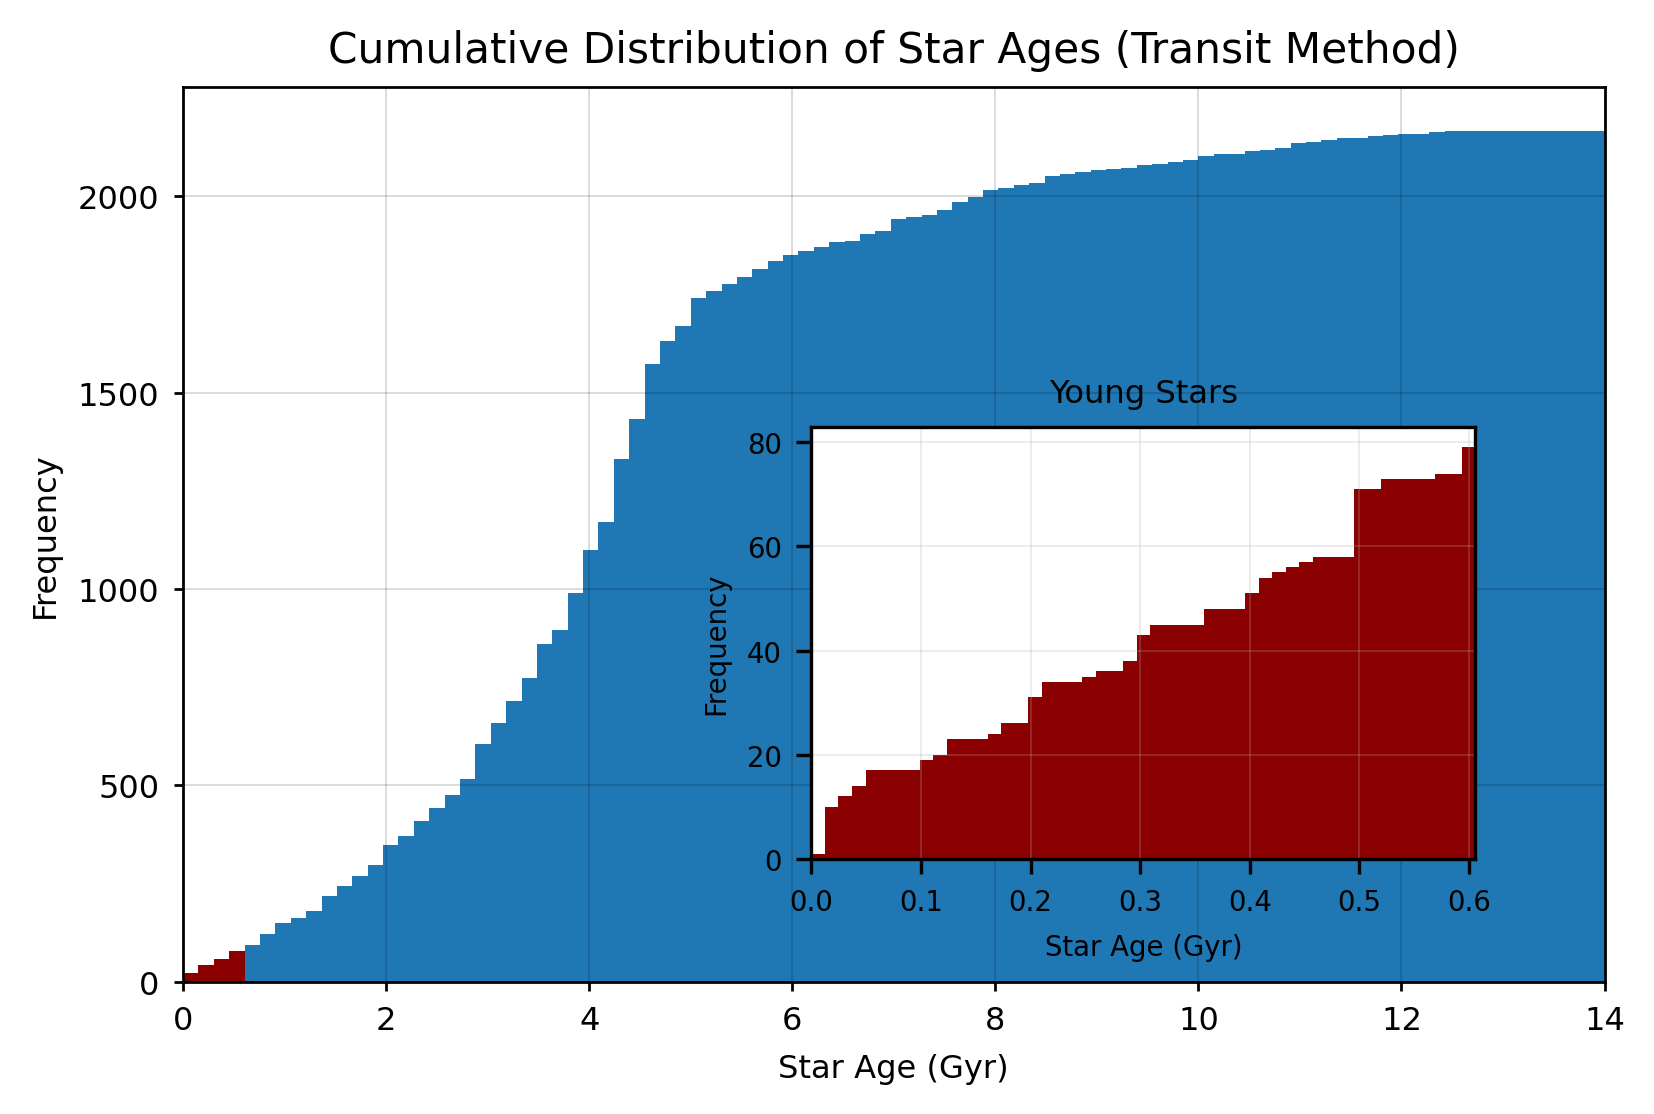

In [36]:
fig, ax, fs = pu.simp_figure(fig_w=1080*3/2, fig_h=1080, 
                             theme=None)

young_lim = 0.606
custom_bins_whole = np.linspace(0, 15, 100)
custom_bins_smol = np.linspace(0, young_lim, 50)

n, bins, patches = ax.hist(df_t['star_age'].dropna(), bins=custom_bins_whole, edgecolor=None, alpha=1, cumulative=True)
for i in range(4):
    patches[i].set_facecolor('darkred')

# Set axis labels and title
ax.set_xlabel('Star Age (Gyr)', fontsize=1.75 * fs)
ax.set_ylabel('Frequency', fontsize=1.75 * fs)
ax.tick_params(axis='both', which='major', labelsize=1.75 * fs)


inner_pos=[0.49, 0.22, 0.41, 0.4] 
# Add inner subplot
ax_in = fig.add_axes(inner_pos)
# set tick size and label size of inner subplot

ax_in.tick_params(axis='both', which='major', labelsize=1.5 * fs)
ax_in.set_xlabel('Star Age (Gyr)', fontsize=1.5 * fs)
ax_in.set_ylabel('Frequency', fontsize=1.5 * fs)
ax_in.hist(df_t['star_age'].dropna(), bins=custom_bins_smol, edgecolor=None, alpha=1, color='darkred', cumulative=True)
ax_in.grid(which='major', linewidth=fs * 0.025)
ax_in.set_title('Young Stars', fontsize=1.75 * fs, color='k', zorder=3)

ax.set_xlim([0, 14])
ax_in.set_xlim([0, young_lim])

ax.set_title('Cumulative Distribution of Star Ages (Transit Method)', fontsize=2.3 * fs, color='k')

savefold = '../figures/age_distros/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = 'cum_trans_meth_distr_age.png'
savepath = savefold + figname

fig.savefig(savepath, dpi=300, bbox_inches='tight')

plt.show()

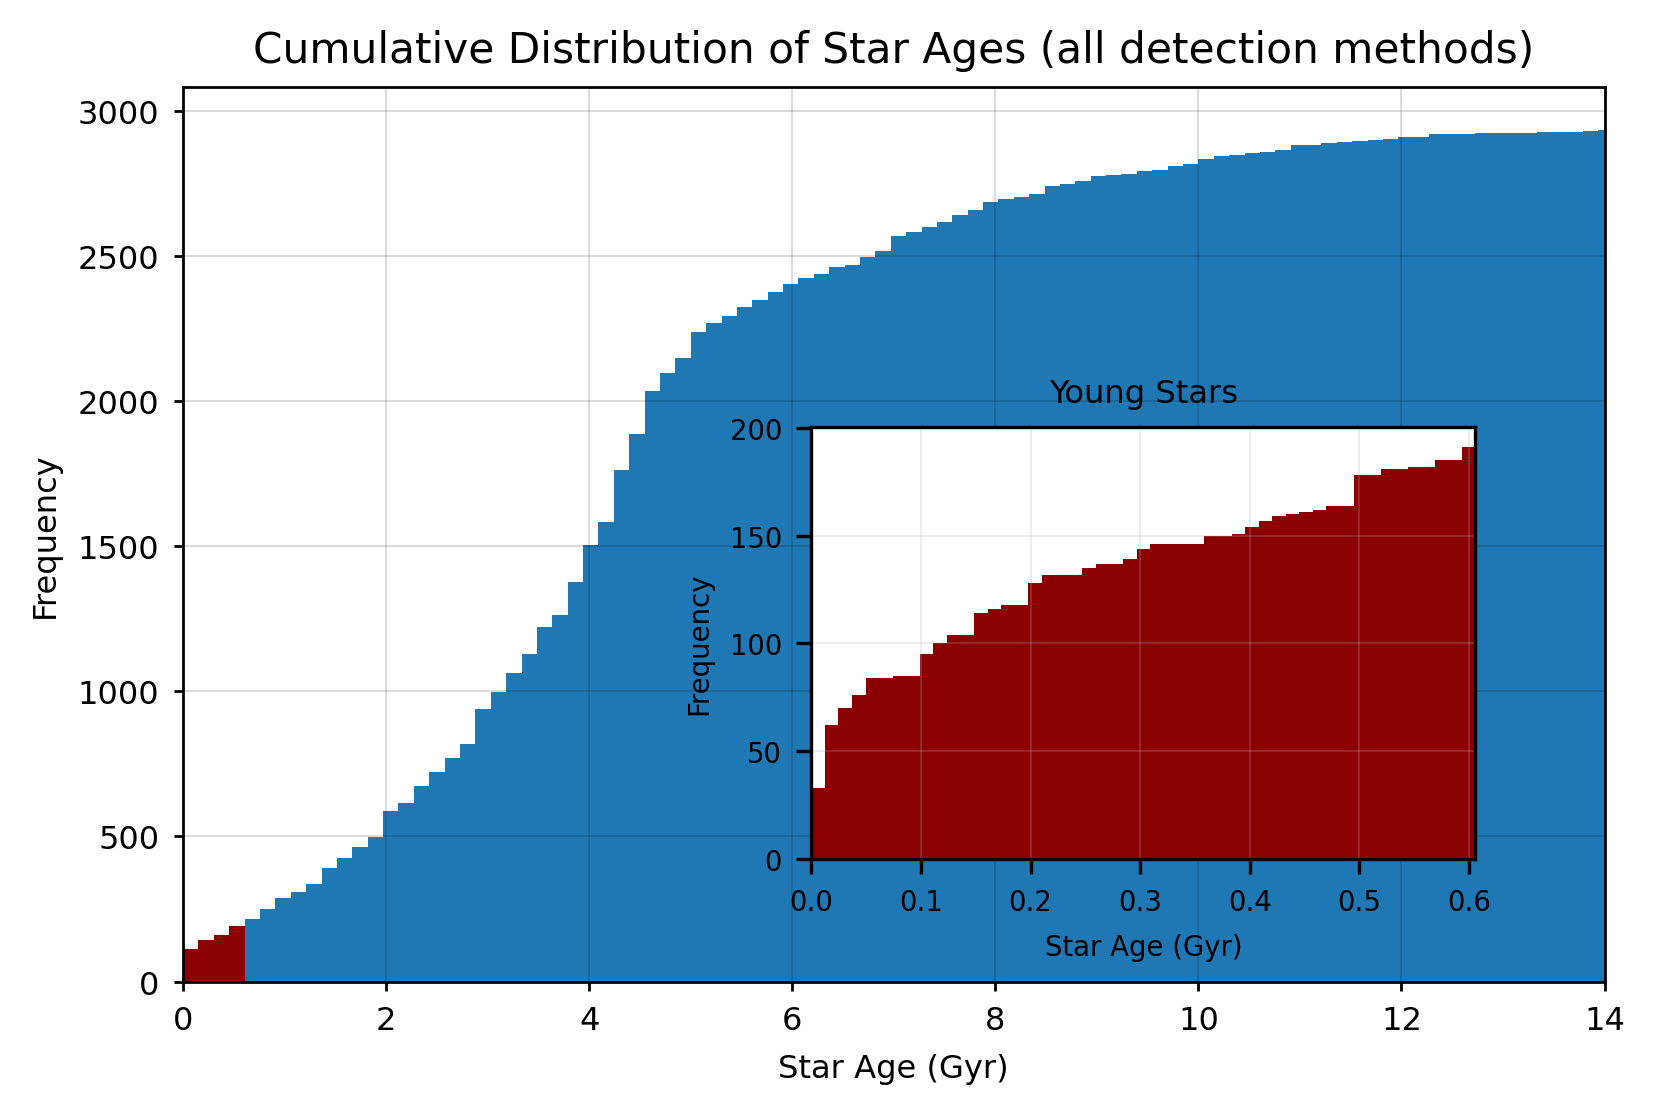

In [42]:
fig, ax, fs = pu.simp_figure(fig_w=1080*3/2, fig_h=1080, 
                             theme=None)

young_lim = 0.606
custom_bins_whole = np.linspace(0, 15, 100)
custom_bins_smol = np.linspace(0, young_lim, 50)

n, bins, patches = ax.hist(df['star_age'].dropna(), bins=custom_bins_whole, edgecolor=None, alpha=1, cumulative=True)
for i in range(4):
    patches[i].set_facecolor('darkred')

# Set axis labels and title
ax.set_xlabel('Star Age (Gyr)', fontsize=1.75 * fs)
ax.set_ylabel('Frequency', fontsize=1.75 * fs)
ax.tick_params(axis='both', which='major', labelsize=1.75 * fs)


inner_pos=[0.49, 0.22, 0.41, 0.4] 
# Add inner subplot
ax_in = fig.add_axes(inner_pos)
# set tick size and label size of inner subplot

ax_in.tick_params(axis='both', which='major', labelsize=1.5 * fs)
ax_in.set_xlabel('Star Age (Gyr)', fontsize=1.5 * fs)
ax_in.set_ylabel('Frequency', fontsize=1.5 * fs)
ax_in.hist(df['star_age'].dropna(), bins=custom_bins_smol, edgecolor=None, alpha=1, color='darkred', cumulative=True)
ax_in.grid(which='major', linewidth=fs * 0.025)
ax_in.set_title('Young Stars', fontsize=1.75 * fs, color='k', zorder=3)

ax.set_xlim([0, 14])
ax_in.set_xlim([0, young_lim])

ax.set_title('Cumulative Distribution of Star Ages (all detection methods)', fontsize=2.3 * fs, color='k')

savefold = '../figures/age_distros/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = 'cum_all_meth_distr_age.png'
savepath = savefold + figname

fig.savefig(savepath, dpi=300, bbox_inches='tight')

plt.show()